In [19]:
# import Required Modules

import pandas as pd

In [20]:
# Reading the StudentsPerformance.csv file

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print(df.shape)

(1000, 8)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [26]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Exploratory Data Analysis and Visualization

In [27]:
# Let's check for the number of unique catergory in each categorical features.

df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [28]:
# Let's Check the percentage of missing value in each column.

no_of_columns = df.shape[0]
percentage_of_missing_data = df.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


## Univarite Analysis

### Numerical Features

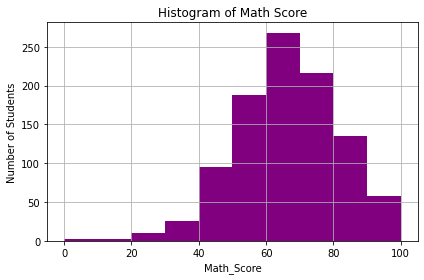

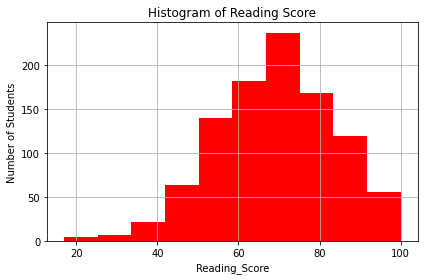

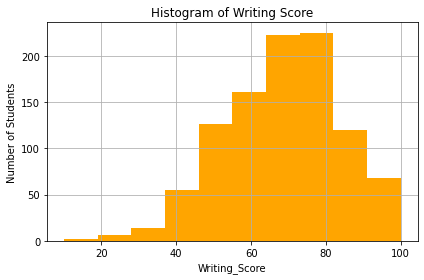

In [29]:
import matplotlib.pyplot as plt

def plot_histogram(x, xlabel, title, color):
    
    'Creates subplots of histogram'
    
    plt.hist(x, color = color)
    
    # Set title, x and y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Students')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot the histogram
plot_histogram(df['math score'], 'Math_Score', 'Histogram of Math Score', 'purple')
plot_histogram(df['reading score'], 'Reading_Score', 'Histogram of Reading Score', 'red')
plot_histogram(df['writing score'], 'Writing_Score', 'Histogram of Writing Score', 'orange')


### Categorical Features

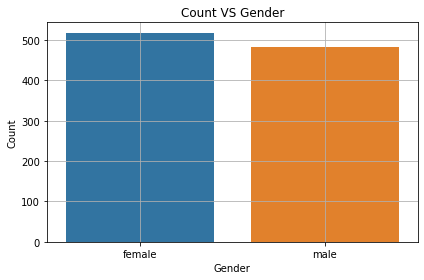

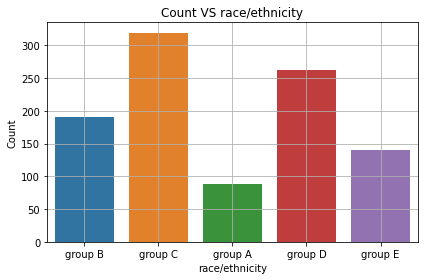

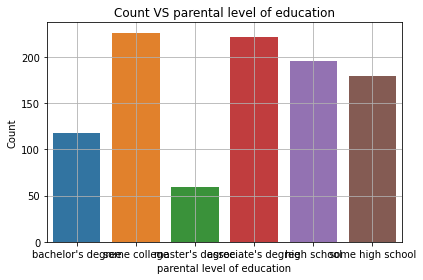

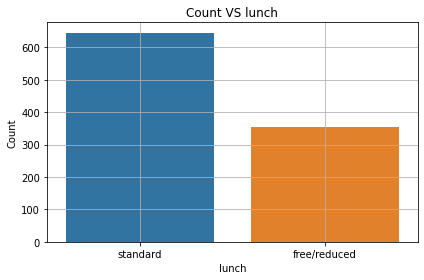

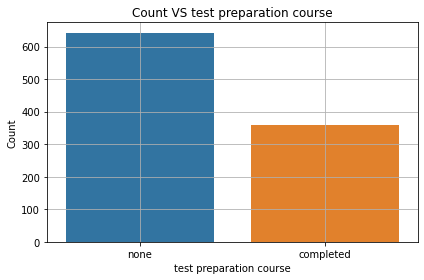

In [30]:
import seaborn as sns

def count_plot(x, df, xlabel, title):
    
    'Creates subplots of histogram'
    
    sns.countplot(x = x, data = df )
        
    # Set title, x and y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot the count plot

count_plot(df['gender'], df, "Gender", "Count VS Gender")
count_plot(df['race/ethnicity'], df, "race/ethnicity", "Count VS race/ethnicity")
count_plot(df['parental level of education'], df, "parental level of education", "Count VS parental level of education")
count_plot(df['lunch'], df, "lunch", "Count VS lunch")
count_plot(df['test preparation course'], df, "test preparation course", "Count VS test preparation course")


In [31]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Observation (from Categorical Features):

* We have almost equal number of male and female students.
* We have least number of students from group A and highest number of student from group C.
* Around 60 parents have a master's degree.
* Around 350 students not able to get a standard lunch and depends on free or reduced lunch.
* 2/3rd students are not preparing test while 1/3rd number of students are completely preparing for the test.

# Multi variate Analysis


In [32]:
#pip install dabl

<AxesSubplot:xlabel='math score', ylabel='gender'>

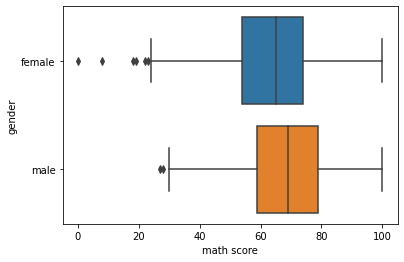

In [33]:
sns.boxplot(x = df['math score'], y = df['gender'])


In [38]:
import seaborn as sns

def box_plot(df,x,y,xlabel, ylabel):
    'Creates subplots of histogram'
    sns.boxplot(x = x, y = y)
    # Set title, x and y labels
    #plt.title(xlabel  ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:
def box_plot_repeat(df, k ):
    list_cat = list(df.select_dtypes('object').columns)
    for cat in list_cat:
        box_plot(df, df[k],df[cat], k, cat)

Creating Box Plot of Categorical Variable with Math Score


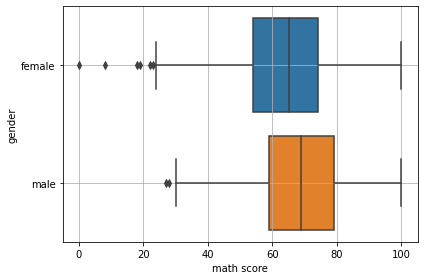

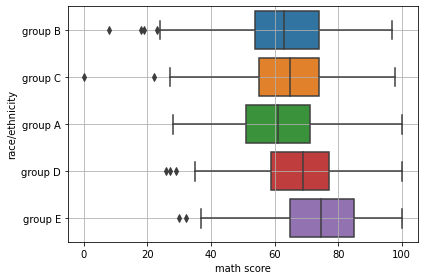

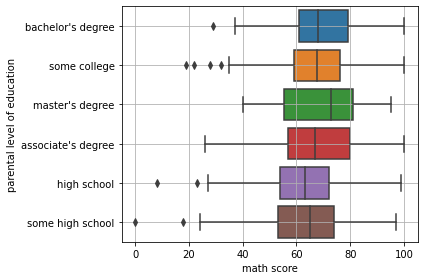

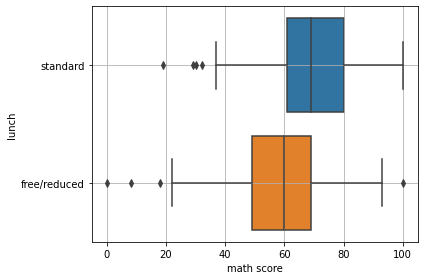

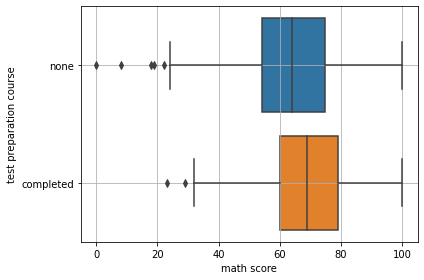

In [40]:
print("Creating Box Plot of Categorical Variable with Math Score")
box_plot_repeat(df, 'math score')


Creating Box Plot of Categorical Variable with Math Score


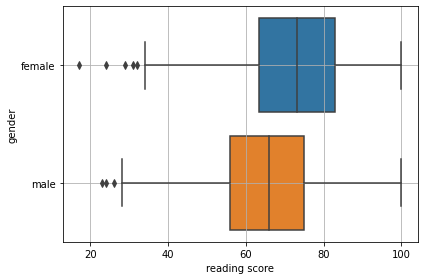

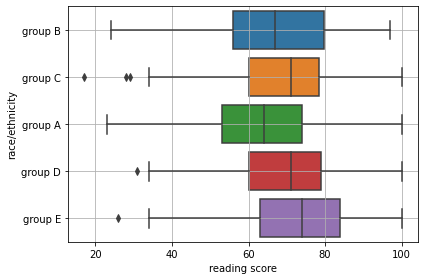

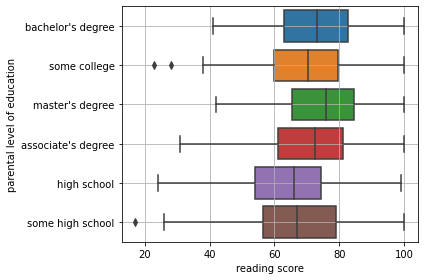

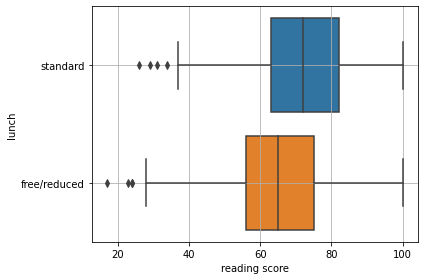

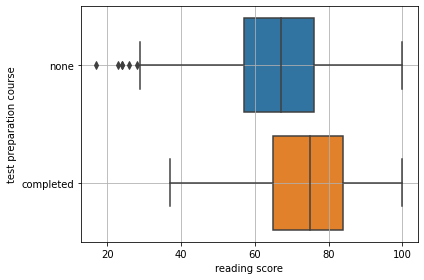

In [41]:
print("Creating Box Plot of Categorical Variable with Math Score")
box_plot_repeat(df, 'reading score')


Creating Box Plot of Categorical Variable with Math Score


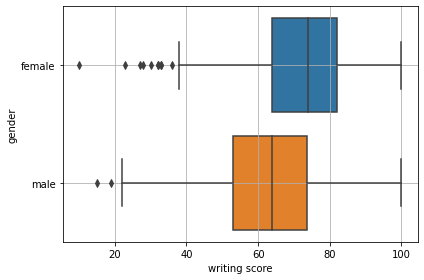

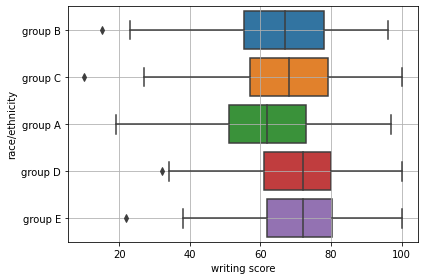

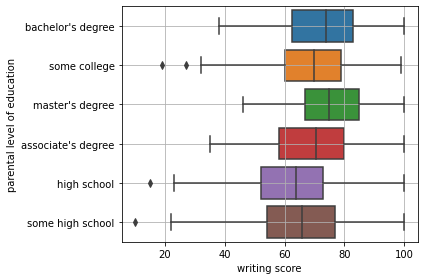

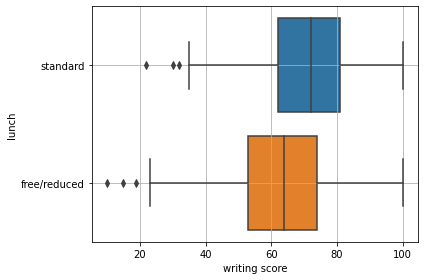

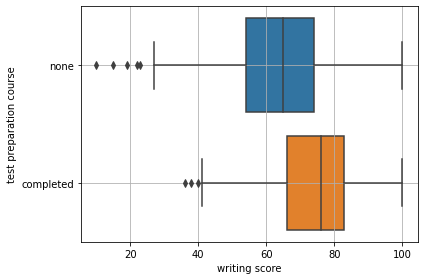

In [42]:
print("Creating Box Plot of Categorical Variable with Math Score")
box_plot_repeat(df, 'writing score')


# Observation of Box Plot

* In general Male stuedent performs better in Maths,While female performs better in reading and writing section.
* student with race as group E are performing better in Math and reading but incase of writing except group A which is lacking 
rest all race students performs same in the writing section.
* students with parental level of education as master's degree have an edge in reading and writing section .
* students having standard lunch seems to perform well in all the 3 sections.
* As Expected in general students who completely prepare for the tests performes better in all the 3 section than the students who are not prepared.